In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import display, HTML
import missingno as msnum 


import warnings
warnings.filterwarnings('ignore')

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':"1BhPIU0ZwRPWAmPVjd3dmKY3ZtEeEcuCV"})

In [5]:
downloaded.GetContentFile('sindh-crime-statistics.csv')

In [6]:
data  = pd.read_csv('sindh-crime-statistics.csv')
data

,Year,Month,Division,District,Crime Type,Reported Number,Notes,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2011,January,Karachi,South Zone,Murder,23.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
1,2011,January,Karachi,South Zone,Murder in the form of target killing,3.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
2,2011,January,Karachi,South Zone,Murder during dacoity/robbery,2.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
3,2011,January,Karachi,South Zone,Highway dacoity/robbery,0.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
4,2011,January,Karachi,South Zone,Bank dacoity/robbery,0.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7729,2014,December,S.B.Abad,N. Feroze,Murder in the form of target killing,0.0,NaN,NaN,NaN,NaN
7730,2014,December,S.B.Abad,N. Feroze,Murder during dacoity/robbery,0.0,NaN,NaN,NaN,NaN
7731,2014,December,S.B.Abad,N. Feroze,Highway dacoity/robbery,0.0,NaN,NaN,NaN,NaN
7732,2014,December,S.B.Abad,N. Feroze,Bank dacoity/robbery,0.0,NaN,NaN,NaN,NaN


In [7]:
data.head()

,Year,Month,Division,District,Crime Type,Reported Number,Notes,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2011,January,Karachi,South Zone,Murder,23.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
1,2011,January,Karachi,South Zone,Murder in the form of target killing,3.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
2,2011,January,Karachi,South Zone,Murder during dacoity/robbery,2.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
3,2011,January,Karachi,South Zone,Highway dacoity/robbery,0.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
4,2011,January,Karachi,South Zone,Bank dacoity/robbery,0.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734 entries, 0 to 7733
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             7734 non-null   int64  
 1   Month            7734 non-null   object 
 2   Division         7734 non-null   object 
 3   District         7734 non-null   object 
 4   Crime Type       7734 non-null   object 
 5   Reported Number  7734 non-null   float64
 6   Notes            319 non-null    object 
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       1 non-null      object 
dtypes: float64(3), int64(1), object(6)
memory usage: 604.3+ KB


In [9]:
data.isnull().any()

Year               False
Month              False
Division           False
District           False
Crime Type         False
Reported Number    False
Notes               True
Unnamed: 7          True
Unnamed: 8          True
Unnamed: 9          True
dtype: bool

In [10]:
data.isnull().sum()

Year                  0
Month                 0
Division              0
District              0
Crime Type            0
Reported Number       0
Notes              7415
Unnamed: 7         7734
Unnamed: 8         7734
Unnamed: 9         7733
dtype: int64

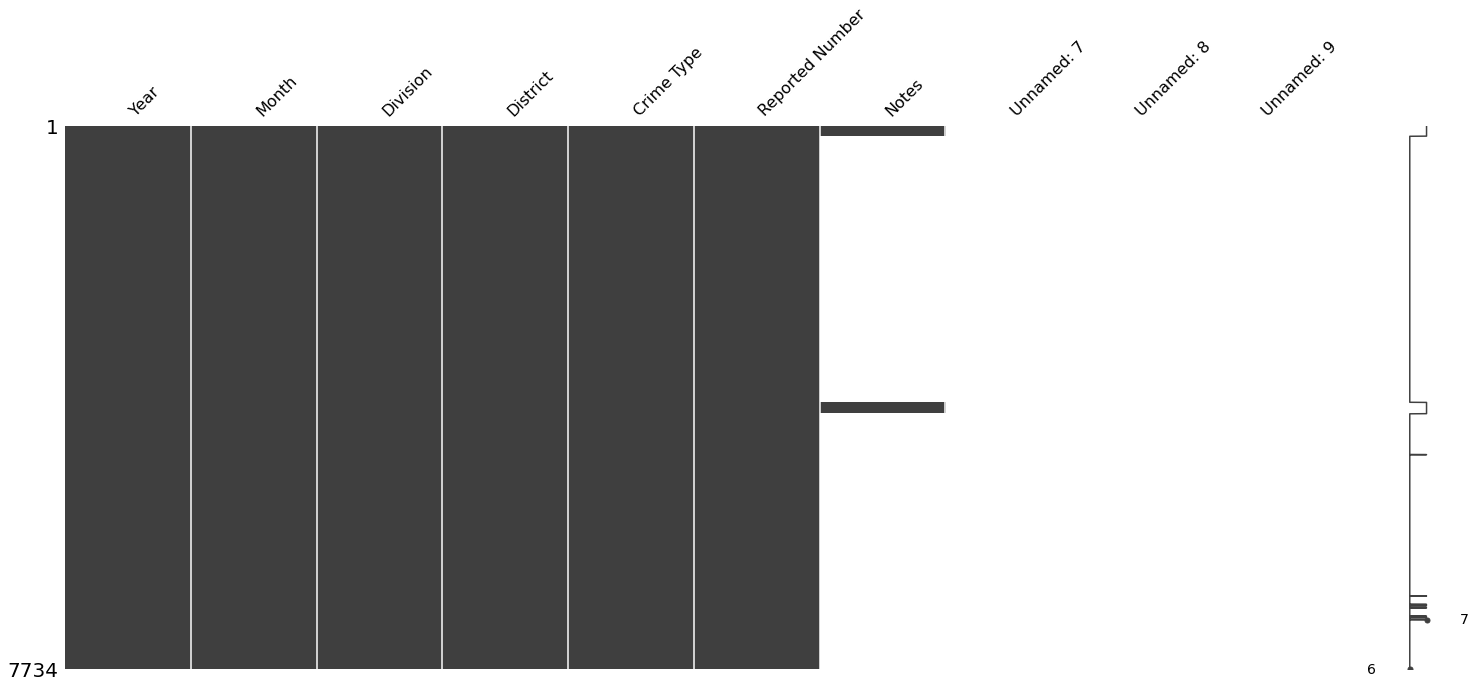

In [11]:
#missing value plot
msnum.matrix(data)

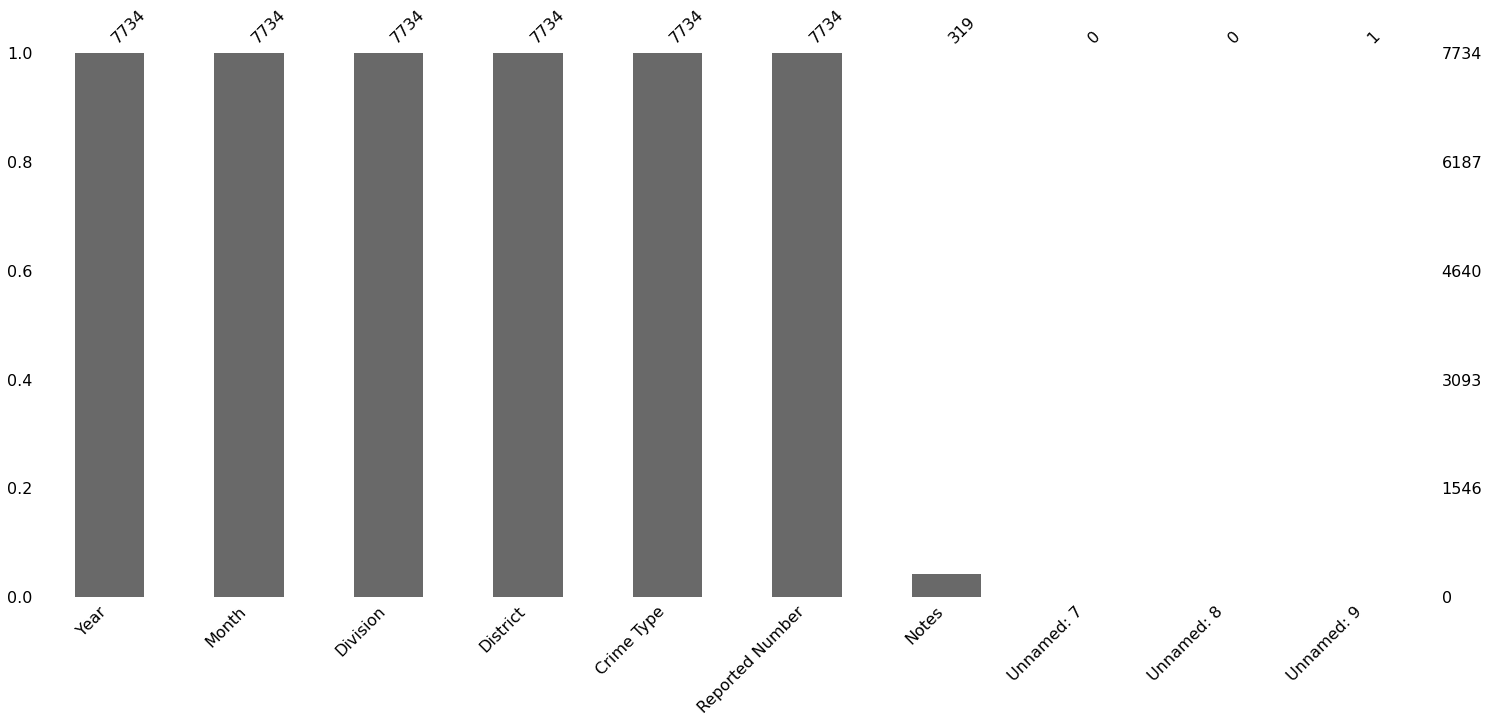

In [12]:
msnum.bar(data)  #missing value plot

In [13]:
my_matrix = [[1,2,3],[4,5,6],[7,8,9]]   #numpy Method
my_matrix
np.array(my_matrix)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [15]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [16]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [17]:
data.describe(include=object)

,Month,Division,District,Crime Type,Notes,Unnamed: 9
count,7734,7734,7734,7734,319,1
unique,12,6,29,6,5,1
top,September,Hyderabad,South Zone,Murder,"Value not available, used formula to calculate...",f
freq,654,2760,288,1289,162,1


In [18]:
#pandas
data['Reported Number'].mean()

2.377424359967675

In [19]:
data[data['District']=='South Zone	'].count()

Year               0
Month              0
Division           0
District           0
Crime Type         0
Reported Number    0
Notes              0
Unnamed: 7         0
Unnamed: 8         0
Unnamed: 9         0
dtype: int64

In [20]:
data['Crime Type'].value_counts().head(5)

Murder                                  1289
Murder in the form of target killing    1289
Murder during dacoity/robbery           1289
Highway dacoity/robbery                 1289
Bank dacoity/robbery                    1289
Name: Crime Type, dtype: int64

In [21]:
data[data['Month']=='March']['Crime Type']

300                                   Murder
301     Murder in the form of target killing
302            Murder during dacoity/robbery
303                  Highway dacoity/robbery
304                     Bank dacoity/robbery
                        ...                 
6217    Murder in the form of target killing
6218           Murder during dacoity/robbery
6219                 Highway dacoity/robbery
6220                    Bank dacoity/robbery
6221                           Car snatching
Name: Crime Type, Length: 642, dtype: object

In [22]:
data['Reported Number'].max()

107.0

In [23]:
data.head()

,Year,Month,Division,District,Crime Type,Reported Number,Notes,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2011,January,Karachi,South Zone,Murder,23.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
1,2011,January,Karachi,South Zone,Murder in the form of target killing,3.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
2,2011,January,Karachi,South Zone,Murder during dacoity/robbery,2.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
3,2011,January,Karachi,South Zone,Highway dacoity/robbery,0.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN
4,2011,January,Karachi,South Zone,Bank dacoity/robbery,0.0,"File for January 2011 not available, calculate...",NaN,NaN,NaN


In [24]:
#fill method against the missing value with some imputation
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])
data['Month'].replace(np.nan, 'No Data',inplace  = True)
data['Division'].replace(np.nan, 'No Data',inplace  = True)
data['District'].replace(np.nan, 'No Data',inplace  = True)
data['Crime Type'].replace(np.nan, 'No Data',inplace  = True)
data['Reported Number'].replace(np.nan, 'No Data',inplace  = True)
data['Notes'].replace(np.nan, 'No Data',inplace  = True)


In [25]:
data.isnull().sum()

Year                  0
Month                 0
Division              0
District              0
Crime Type            0
Reported Number       0
Notes                 0
Unnamed: 7         7734
Unnamed: 8         7734
Unnamed: 9         7733
dtype: int64

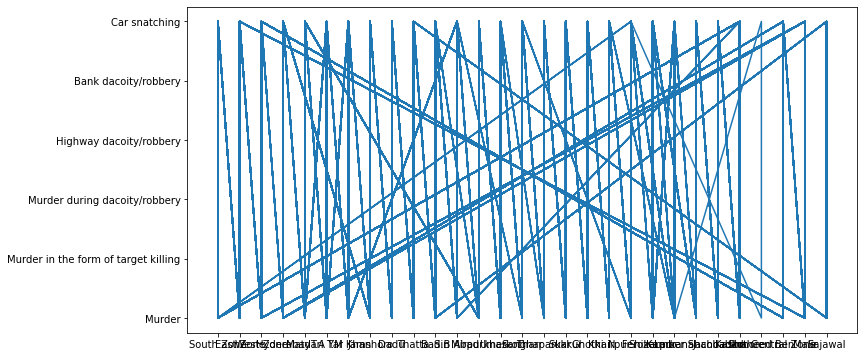

In [26]:
data["Year"] = data["Year"].astype("datetime64[ns]") #plotting through matplotlib on various features 
plt.figure(figsize=(12,6))
plt.plot(data["District"], data["Crime Type"])

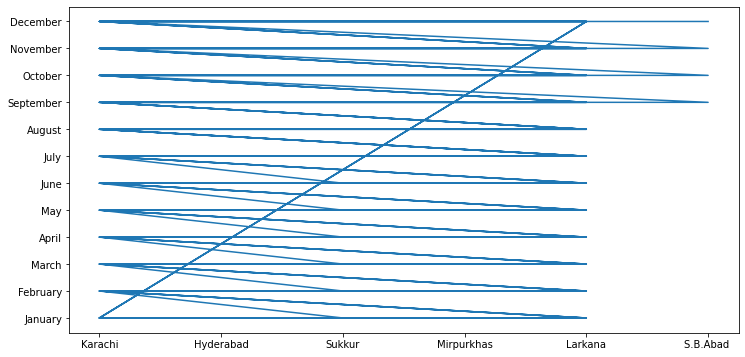

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data["Division"], data["Month"])

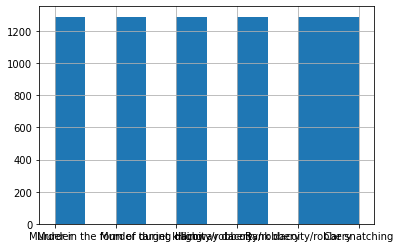

In [28]:
data['Crime Type'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c7430df90>,
      dtype=object)

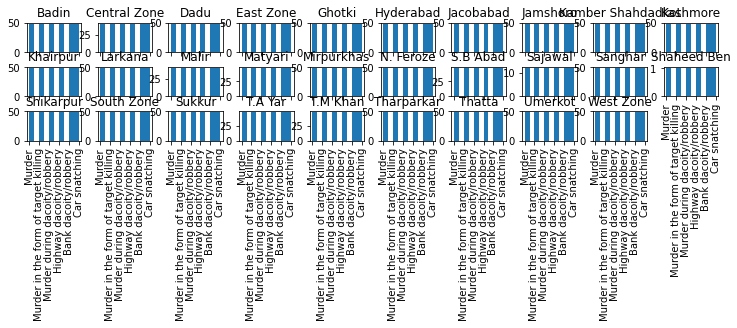

In [31]:
data.hist(column='Crime Type',by='District',layout=(4,10),figsize=(12,3),sharex=True)

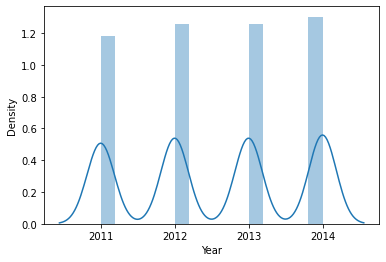

In [37]:
#plotting through Seaborn on various features 
sns.distplot(data['Year'])

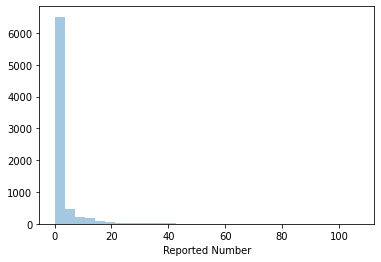

In [50]:
sns.distplot(data['Reported Number'],kde=False,bins=30)

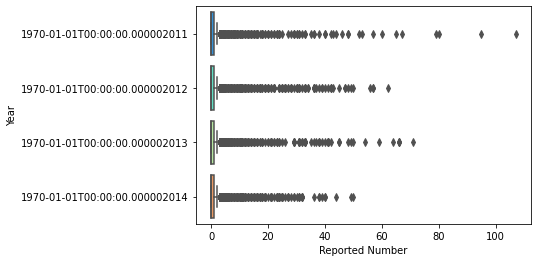

In [54]:
sns.boxplot(x="Reported Number", y="Year", data=data,palette='rainbow')

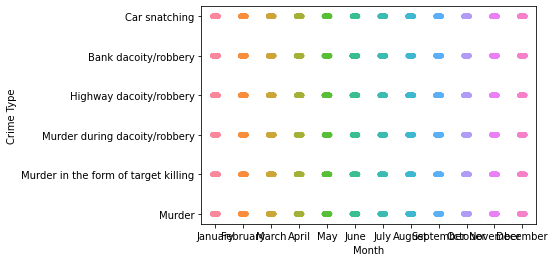

In [57]:
sns.stripplot(x="Month", y="Crime Type", data=data,jitter=True)

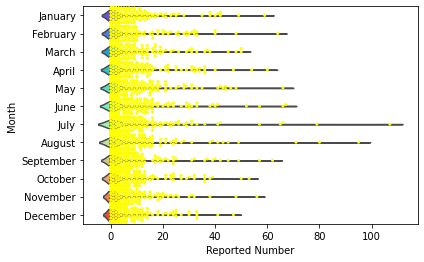

In [60]:
sns.violinplot(x="Reported Number", y="Month", data=data,palette='rainbow')
sns.swarmplot(x="Reported Number", y="Month", data=data,color='yellow',size=3)

In [129]:
#classification & Models
feature_names = [  'Reported Number']
X = data[feature_names]
y = data['Year']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.29
Accuracy of Decision Tree classifier on test set: 0.27


In [132]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.27
Accuracy of Logistic regression classifier on test set: 0.26


In [133]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.28
Accuracy of K-NN classifier on test set: 0.28


In [134]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.27
Accuracy of SVM classifier on test set: 0.26


In [103]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.27094105480868663


In [107]:
# eadaboost algorithm 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)


In [123]:
#Ensemble models
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8630000000000001

In [135]:
#Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [136]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.26
Accuracy of Logistic regression classifier on test set: 0.25


In [137]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.27
Accuracy of SVM classifier on test set: 0.26


In [138]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.27213962508080153


In [146]:
#Confussion Matrix
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

    y_Actual  y_Predicted
0          1            1
1          0            1
2          0            0
3          1            1
4          0            0
5          1            1
6          0            1
7          0            0
8          1            1
9          0            0
10         1            0
11         0            0


In [149]:
 from sklearn.metrics import classification_report
 print(classification_report(y_true, y_pred, ))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6

